# Tarea N°1 - Máquinas de Aprendizaje - ILI393
### Martín Villanueva A.

## Introducción

En esta primera tarea, se tiene como objetivo la implementación y testeo de algoritmos para regresión lineal y regresión logística. En ambos casos la búsqueda de  los mejores parámetros del modelo se realiza por medio de  _Gradiente Descendente_ (batch y online) y _Newton-Raphson_. Para la correcta selección de los _hiperparámetros_ se realiza 5-fold cross-validation, intentando de este modo que los modelos resultantes no caigan en problemas de _overfitting_.

## Parte 1 - Regresión Lineal

 <font color="green">**Nota**: Ver comentarios de implementación en Anexo _Implementación de algoritmos de regresión lineal._ </font>

### 1) Estimación de parámetros en regresión lineal

   A continuación se estiman los parámetros de regresión lineal usando **Gradiente descendente batch**, **Gradiente descendente online** y el método de **Newton-Raphson**, para cada uno de los datasets generados aleatoriamente (<font color="green">sin embargo, </font>  sólo se muestran los resultados para el dataset 0 y 14). Para cada uno de los algoritmos, se prueba con la data tal como está (_raw data_), con la data reescalada al intervalo [0,1] (_rescaled data_) y con la data normalizada (_mormalized data_). Se aclara que para los últimos dos casos, solo las _features_ son transformadas dejando la variable de salida igual. Esto por motivos de simplicidad.
 
Para la selección del _hiperparámetro_ $\alpha$ (para los algoritmos que lo tienen) se realiza 5-fold cross validation, ocupando como métrica de error el ECM. En cada caso se selecciona el $\alpha$ que en promedio tenga menor ECM sobre los folds. Los resultados de los errores en cross-validation se muestran en _boxplots_ donde la línea punteada indica la media. 

Se muestran a continuación los parámetros a ocupar en cada caso. Estos fueron seleccionados de modo que los algoritmos logren converger en todos los datasets.

In [17]:
#alphas to try on raw data
alphas1 = np.linspace(4.5e-8, 4.5e-7, 5, endpoint=True)
#alphas to try on rescaled and normalized data
alphas2 = np.array([1.0e-3, 0.8e-3, 0.6e-3, 0.4e-3, 0.2e-3])

### 1a) Gradiente Descendente Batch 

### Raw data

##############################################################
Dataset: 0
Best alpha: 4.5e-07


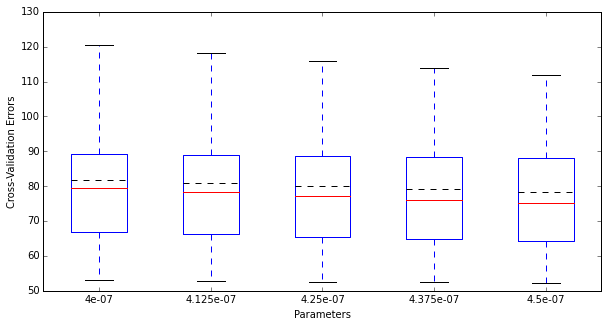

Training error: 47.7018651247
Testing error: 98.5365507026
N° iterations: 41839
Beta: [ 1.45007051 -0.07488509  3.6586664  -3.18223332 -0.06170004  3.49975134
  2.64216044  0.01071132 -0.01107893 -0.13169927  3.28244344  0.81753365
  1.61203648]
##############################################################


##############################################################
Dataset: 14
Best alpha: 4.5e-07


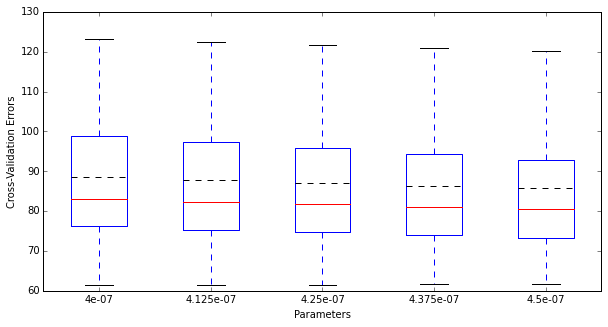

Training error: 55.3889121746
Testing error: 87.9559175097
N° iterations: 36435
Beta: [ 1.25097182 -0.06527964  4.28808828 -2.78390695 -0.03263313  2.25244654
  2.20500163  0.03132868  0.02280227 -0.0866293   2.26144347  0.67313098
  1.52788902]
##############################################################




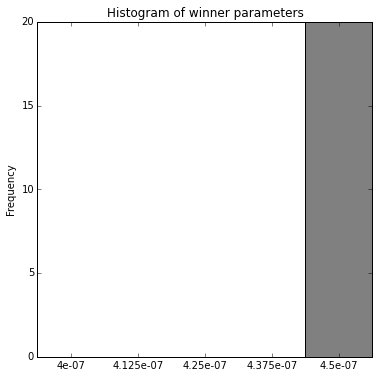

In [81]:
solve_regression(gd_batch, 'linear', params=alphas1, show=[0,14])

### Rescaled data

##############################################################
Dataset: 0
Best alpha: 0.0006


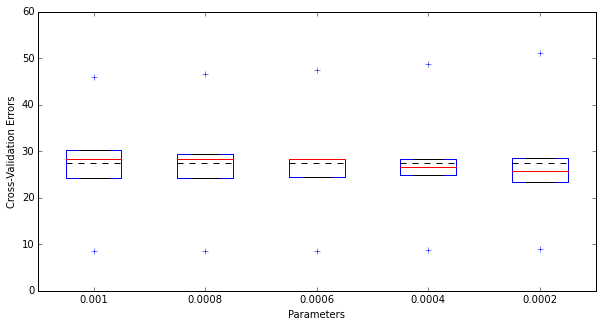

Training error: 13.0062050605
Testing error: 65.2571301369
N° iterations: 7718
Beta: [ 39.12819425 -21.12211183  18.39155828 -16.19472306 -15.69925885
  40.12054606  16.08049095 -16.64772494  -5.87286996 -13.08148087
   5.18930831   9.8497999   23.09701364]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.0004


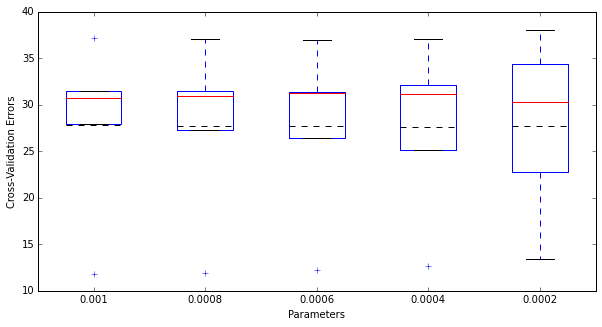

Training error: 16.0666898014
Testing error: 117.196223122
N° iterations: 7069
Beta: [ 34.73242323 -22.10504461  19.13642107 -17.57468323 -12.91483417
  24.70000691  16.79789533 -12.87150976  -0.28195429  -9.29053417
   4.82209831   7.73622924  21.85011054]
##############################################################




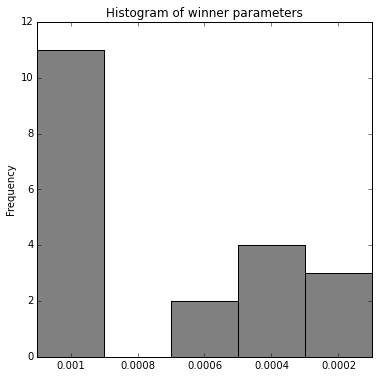

In [82]:
solve_regression(gd_batch, 'linear', params=alphas2, data_func=rescale, show=[0,14])

### Normalized data

##############################################################
Dataset: 0
Best alpha: 0.0002


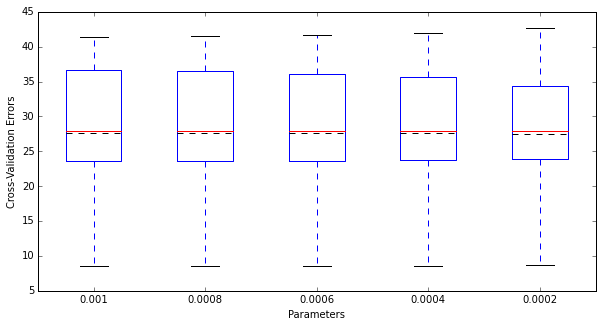

Training error: 12.7266740348
Testing error: 38.4079585793
N° iterations: 1535
Beta: [ 42.22724     -4.04315611   4.26533185  -3.44623502  -3.92100029
   7.94102272   3.2702556   -4.1383568   -1.97993514  -3.21326375
   2.34548981   1.78377407   3.69012969]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.0002


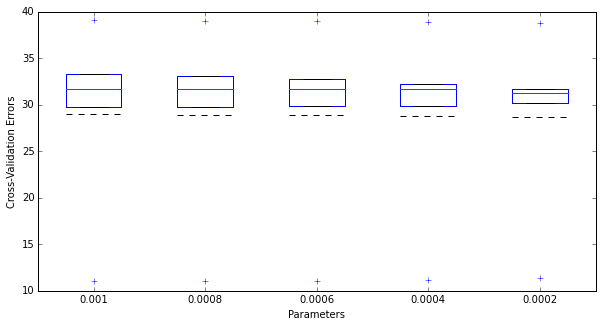

Training error: 15.5571989603
Testing error: 62.1502546032
N° iterations: 1247
Beta: [ 40.89617307  -4.41645044   4.65591513  -3.24699131  -3.01341205
   6.15241167   3.18925751  -3.01318514  -0.7306811   -1.94002047
   2.23849568   1.67650332   3.7519758 ]
##############################################################




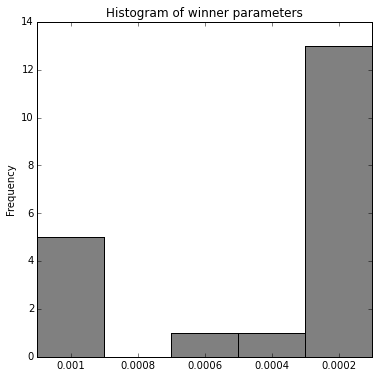

In [83]:
solve_regression(gd_batch, 'linear', params=alphas2, data_func=normalize, show=[0,14])

** Análisis :**
+ En _raw data_, requiere una cantidad muy alta de iteraciones (en comparación a la ejecución con data transformada) para poder cumplir con el criterio de tolerancia.
+ En _raw data_ se obtiene en todos los datasets el mismo $\alpha$. Sin embargo con un alfa ligeramente superior, produce divergencia en algunos datasets.
+ Si bien en _rescaled data_ se logra bajar el training error este obtiene valores de testing error muy grandes, siendo esta una señal de que no se está generalizando bien.
+ Quien obtiene los mejores resultados es _normalized data_ quien baja tanto training como testing set. Este, curiosamente tiene como $\alpha$ ganador el valor más bajo entre sus candidatos.
+ En general los parámetros ($\beta$) que se estiman con data transformada son relativamente similares, siendo muy diferentes los resultados de la data sin procesar.

### 1b) Gradiente Descendente Online

### Raw data

##############################################################
Dataset: 0
Best alpha: 4.5e-07


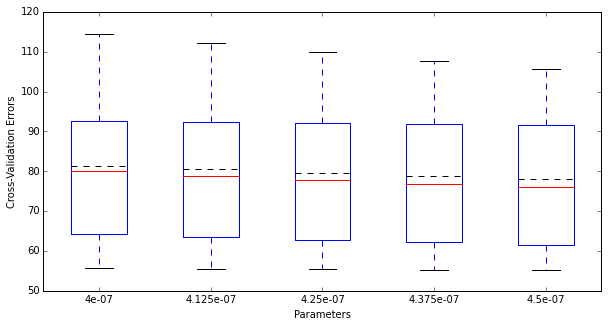

Training error: 47.893692584
Testing error: 92.0966603914
N° iterations: 41750
Beta: [ 1.44743538 -0.07561652  3.75762753 -3.18374354 -0.05915529  3.49252504
  2.63832438  0.01618509 -0.01063685 -0.13032407  3.33221125  0.82855592
  1.60927934]
##############################################################


##############################################################
Dataset: 14
Best alpha: 4.5e-07


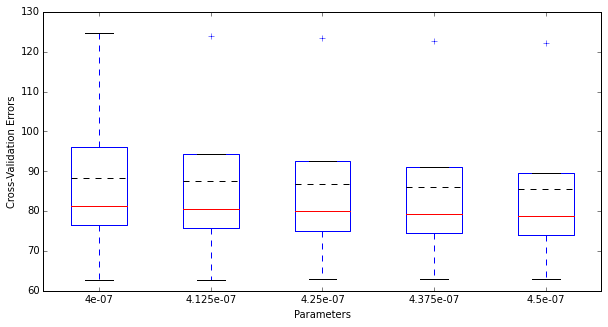

Training error: 55.8103948422
Testing error: 90.6429254352
N° iterations: 35905
Beta: [ 1.2456976  -0.06302368  4.25706545 -2.80026583 -0.03055873  2.25006487
  2.19745817  0.02962207  0.02517746 -0.08795016  2.27081981  0.68127569
  1.51489836]
##############################################################




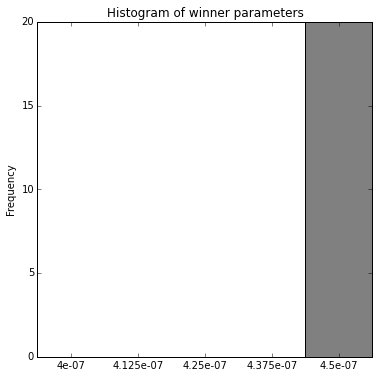

In [84]:
solve_regression(gd_online, 'linear', params=alphas1, show=[0,14])

### Rescaled data

##############################################################
Dataset: 0
Best alpha: 0.0006


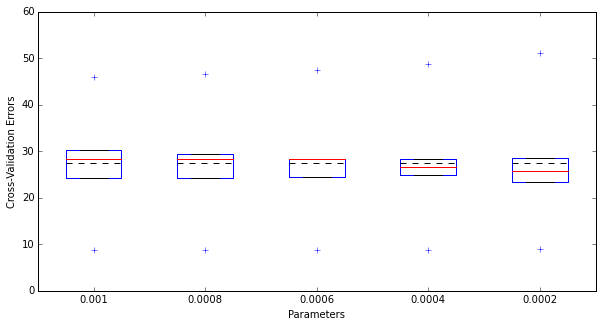

Training error: 13.0074188914
Testing error: 65.2775158068
N° iterations: 7716
Beta: [ 39.11586288 -21.13773613  18.38923592 -16.19356204 -15.68824135
  40.11271443  16.08682569 -16.63465575  -5.85040966 -13.0824112
   5.18382194   9.84443059  23.10824319]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.0004


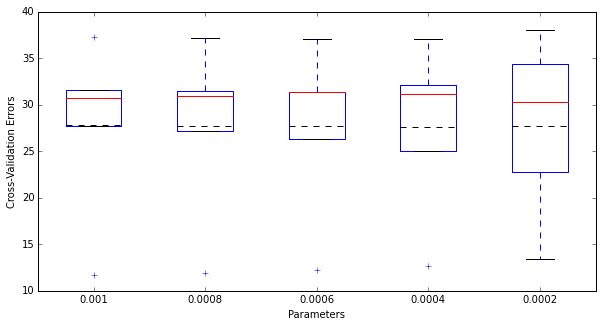

Training error: 16.0677328294
Testing error: 116.829116646
N° iterations: 7064
Beta: [ 34.73450412 -22.09303313  19.13751004 -17.56842087 -12.90745353
  24.70228606  16.79769427 -12.87780319  -0.27587361  -9.28366899
   4.82556481   7.73872531  21.85695518]
##############################################################




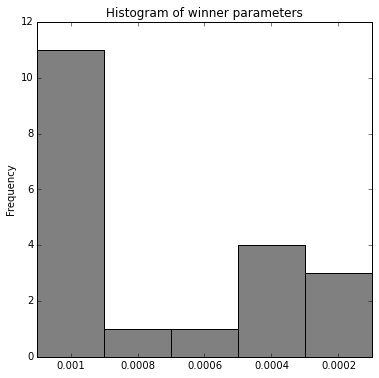

In [85]:
solve_regression(gd_online, 'linear', params=alphas2, data_func=rescale, show=[0,14])

### Normalized data

##############################################################
Dataset: 0
Best alpha: 0.0002


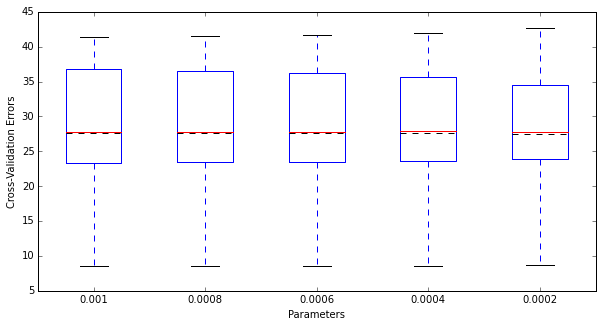

Training error: 12.7265440344
Testing error: 38.3704391845
N° iterations: 1534
Beta: [ 42.22651525  -4.04140807   4.26533568  -3.4473847   -3.91726341
   7.94397391   3.2690175   -4.13530417  -1.98042413  -3.21060613
   2.3436141    1.78623768   3.68635631]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.0002


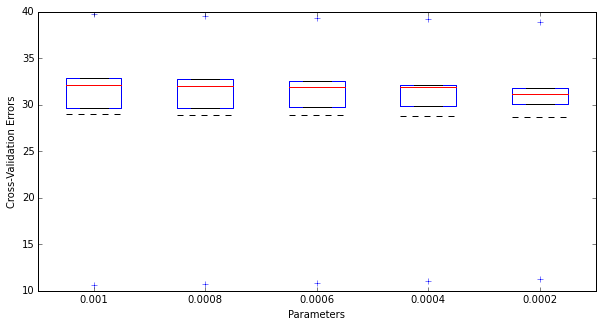

Training error: 15.5578083558
Testing error: 62.0802332363
N° iterations: 1246
Beta: [ 40.90051166  -4.41111303   4.65629245  -3.23988907  -3.02102368
   6.15780585   3.18893045  -3.01289097  -0.72534675  -1.94083012
   2.23955199   1.67463493   3.75080069]
##############################################################




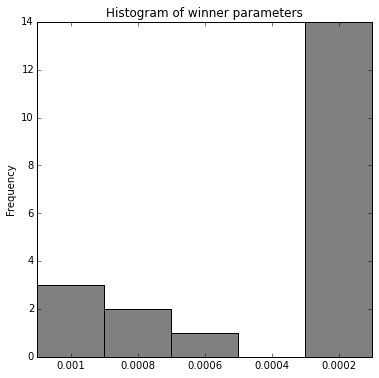

In [86]:
solve_regression(gd_online, 'linear', params=alphas2, data_func=normalize, show=[0,14])

** Análisis :**
+ _GD online_ se comporta prácticamente igual a _GD batch_ en los 3 casos (_raw, rescaled y normalized_). Como bien es sabido, la versión _online_ tiende a converger más rápido que _batch_. Esto se puede apreciar ligeramente en los resultados, pero sin embargo la diferencia en el número de iteraciones es baja y no permite concluir categoricamente. Quizas sea necesario ir disminuyendo el learning rate $\alpha$ para apreciar este efecto.
+ Los parámetros del modelo que obtiene _GD online_ son prácticamente los mismos a los que obtiene _GD batch_ para cada representación de la data, respectivamente.

### 1c) Newton Raphson

### Raw data

In [78]:
solve_regression(nr_linear, 'linear', show=[0,14])

##############################################################
Dataset: 0
Training error: 12.690235978
Testing error: 29.8692128464
N° iterations: 2
Beta: [ 27.77312374  -0.19196441   3.64271996  -2.61978866  -0.04940511
   3.27558724   0.8950743   -0.94639251  -0.03448292  -0.13677948
   2.89862662  12.4397042   13.71043458]
##############################################################


##############################################################
Dataset: 14
Training error: 15.5168045543
Testing error: 22.256882111
N° iterations: 2
Beta: [  2.92044009e+01  -2.45567403e-01   3.72846884e+00  -2.50624227e+00
  -3.72800837e-02   2.92327199e+00   8.33168001e-01  -6.98788024e-01
  -1.71242668e-02  -1.04831696e-01   2.76379484e+00   1.24136911e+01
   1.31720844e+01]
##############################################################




### Rescaled data

In [79]:
solve_regression(nr_linear, 'linear', data_func=rescale, show=[0,14])

##############################################################
Dataset: 0
Training error: 12.690235978
Testing error: 70.8230012379
N° iterations: 2
Beta: [ 37.68776506 -21.30804932  18.21359978 -15.71873198 -15.80963497
  45.85822131  16.11133741 -17.03506525 -10.86211949 -13.67794787
   5.79725325  12.4397042   24.27432442]
##############################################################


##############################################################
Dataset: 14
Training error: 15.5168045543
Testing error: 153.683962628
N° iterations: 2
Beta: [ 32.95912586 -27.25798171  18.64234419 -15.03745362 -11.92962679
  29.23271995  18.32969603 -12.57818444  -5.37701976 -10.48316963
   5.52758969  12.41369113  23.32117544]
##############################################################




### Normalized data

In [80]:
solve_regression(nr_linear, 'linear', data_func=normalize, show=[0,14])

##############################################################
Dataset: 0
Training error: 12.690235978
Testing error: 39.1167896725
N° iterations: 2
Beta: [ 42.22724     -3.99216233   4.26196505  -3.44486437  -3.93375017
   8.28671753   3.23536861  -4.20056151  -2.37742955  -3.2700182
   2.44555845   1.89445678   3.72993749]
##############################################################


##############################################################
Dataset: 14
Training error: 15.5168045543
Testing error: 61.1820073443
N° iterations: 2
Beta: [ 40.89617333  -4.54027498   4.63264649  -3.14293395  -2.94434592
   6.47945038   3.19280105  -3.05719739  -1.09358413  -2.01526648
   2.3439993    1.82778689   3.80201253]
##############################################################




** Análisis: **
+ Es muy importante notar la baja cantidad de iteraciones con las que se converge en todos los casos (2). Esto se debe a que técnicamente lo que hace _Netwton-Raphson_ para regresión lineal, es computar la solución de mínimos cuadrados:

$$ \beta^{p+1} = \beta^{p} - H^{-1}\nabla_{\beta}f = \beta^p - (X^T X)^{-1}(X^T(X \beta^p - Y)) = (X^T X)^{-1} X^T Y$$

el hecho de que no termine en una iteración, es sólo debido a que el cómputo no es directo y a las aproximaciones numéricas. Si se sube la tolerancia, el algoritmo de todos modos realizará más iteraciones.
+ _Newton-Raphson_ logra en general llegar a mejores óptimos que los otros algoritmos. Esto se nota en los bajos errores en el training set, lo cual es un peligro pues puede sobre ajustar el modelo obtenido, generando poca capacidad de generalización.
+ A diferencia de los otros dos algoritmos, en este la data sin procesar (_raw data_) tiene buenos resultados. Esto se debe principalmente a que no hay dependencia del learning rate $\alpha$.
+ _Normalized data_ sigue obteniendo los mejores resultados.

### 2a) Computo del ECM/MSE para Gradiente Descendente Batch

En la siguiente tabla se aprecian los valores de ECM en training y testing para todos los datasets, y para todas las modificaciones de la data. Algunas cosas importantes a notar son las siguientes:
+ En general el error de testing es mayor al error de training. Sin embargo para data normalizada esta diferencia es menor.
+ Con _rescaled data_ se logra bajar el training error (respecto de _raw data_) pero sin embargo tiene malos resultados en el testing set. Notar por ejemplo los datasets 13 y 16, donde el testing set que obtiene _rescaled data_ está muy por sobre el resto. Esto indica que se está llegando a modelos sobre ajustados.

<img src='1.png' style="width: 850px;">

### 2b) Computo del ECM/MSE para Gradiente Descendente Online

Los resultados que obtiene _GD online_ son prácticamente iguales (leves diferencias) respecto a los obtenidos con _GD batch_. Las distintas formas de representación de la data, producen el mismo comportamiento que en la versión batch (mejor performance la obtiene _normalized_ y el testing error tiende a ser superior en general).

<img src='2.png' style="width: 850px;">

### 2c) Cómputo del ECM/MSE para Newton Raphson

A partir de los ECM de la tabla siguiente se puede decir sobre _NR_ lo siguiente:
+ Como se mencionó anteriormente, a diferencia de los otros dos algoritmos este obtiene muy buenos resultados para la data sin manipular, y esto se debe a la independencia en el resultado del parámetro $\alpha$ (learning rate).
+ En general todos los errores de training set disminuyen. Esto pues _NR_ obtiene un óptimo mucho más preciso al computar la solución por mínimos cuadrados.
+ Esto último produce un ligero aumento de los errores de testing set. Esto es bastante natural, pues mientras más se sobre ajuste el modelo al training set, más propenso será de caer en el fenómeno de overfitting.

<img src='3.png' style="width: 850px;">

### 3) Locally weighted linear regression

A continuación se estima el parámetro $\tau$ de _locally weighted linear regression_, para cada uno de los datasets generados aleatoriamente (sin embargo sólo se muestran los resultados para el dataset 0 y 14).

Para la selección del _hiperparámetro_ $\tau$ se realiza 5-fold cross validation,  <font color="green">ocupando el ECM/MSE:

$$ MSE = \frac{1}{M-1}\sum_{m=1}^{M} (f_{\beta}(x_m)-y_m)^2 $$

de tal modo que para cada fold se computa el MSE por cada modelo ($\beta$) que predice localmente  en el testing set, promediando luego los resultados para obtener el _mean MSE_, que es la métrica de error utilizada. Finalmente se selecciona el $\tau$ que en promedio tenga menor _mean MSE_ sobre los folds. </font>

Se aplica este algoritmo a _raw data_, _rescale data_ y _normalized data_ igual que antes. A continuación se muestran los candidatos a parámetros $\tau$ utilizados, los cuales fueron elegidos de modo que existiese convergencia en todos los datasets.

In [75]:
#parameters to try on raw data
taus1 = np.linspace(30.,100.,5, endpoint=True)
#parameters to try on rescaled data
taus2 = np.linspace(0.2,2.,5, endpoint=True)
#parameters to try on normalized data
taus3 = np.linspace(1.,3.,5, endpoint=True)

### Raw data

##############################################################
Dataset: 0
Best tau: 100.0


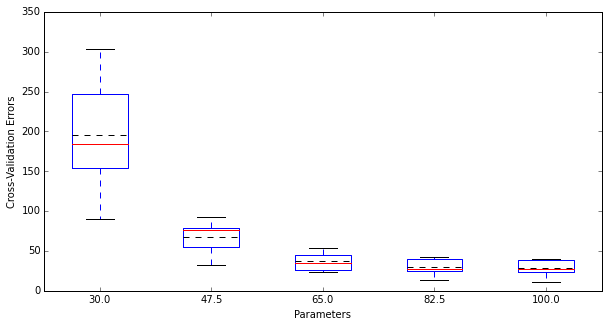

Mean training error: 13.9708194542
Mean testing error: 30.6070325793
##############################################################


##############################################################
Dataset: 14
Best tau: 100.0


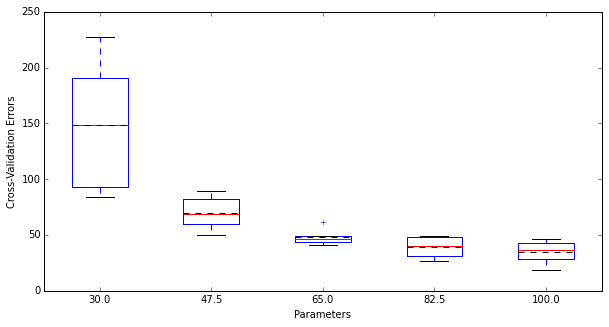

Mean training error: 17.9772193096
Mean testing error: 28.8310546838
##############################################################




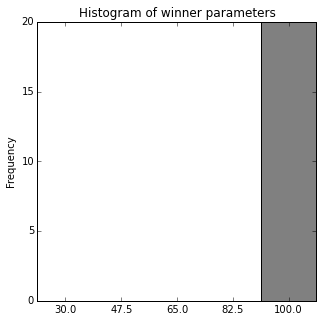

In [79]:
solve_weighted(taus1, show=[0,14])

### Rescaled data

##############################################################
Dataset: 0
Best tau: 1.1


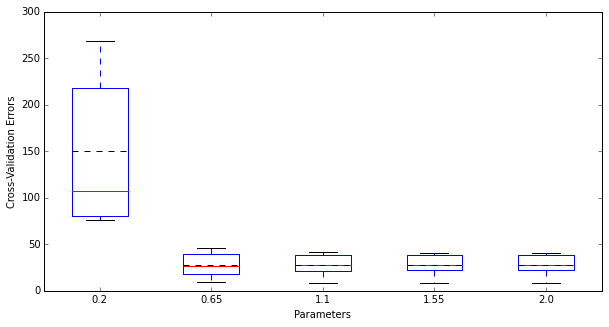

Mean training error: 12.8680336262
Mean testing error: 70.2538422886
##############################################################


##############################################################
Dataset: 14
Best tau: 1.1


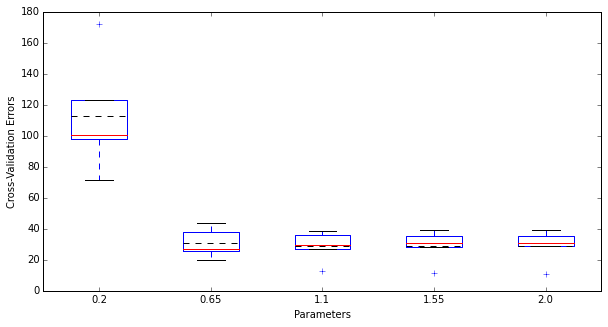

Mean training error: 15.8910639207
Mean testing error: 158.00874091
##############################################################




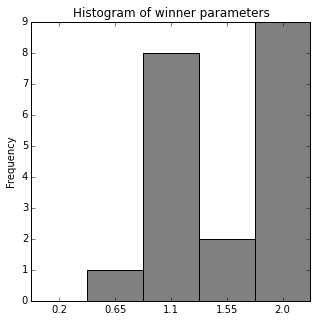

In [81]:
solve_weighted(taus2, data_func=rescale, show=[0,14])

### Normalized data

##############################################################
Dataset: 0
Best tau: 3.0


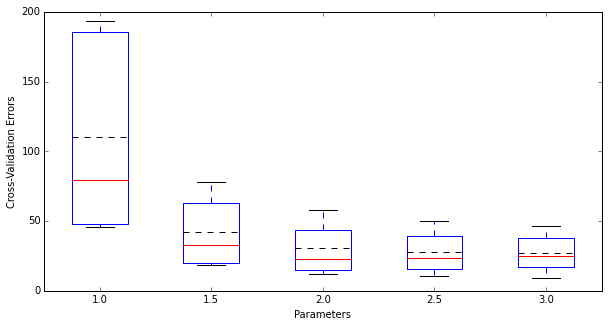

Mean training error: 14.0754337259
Mean testing error: 38.1545878007
##############################################################


##############################################################
Dataset: 14
Best tau: 3.0


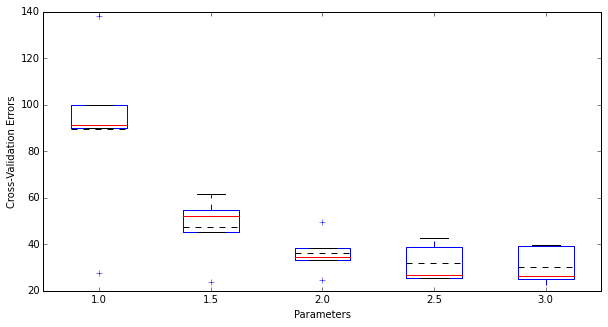

Mean training error: 17.9931698801
Mean testing error: 62.4797627491
##############################################################




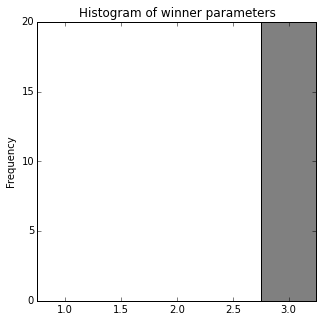

In [83]:
solve_weighted(taus3, data_func=normalize, show=[0,14])

** Análisis :** (Cabe mencionar que los errores reportados <font color="green"> son los promedios de MSE (training y testing), con los parámetros $\beta$ estimados sobre cada uno de los punto en el testing set.</font>)
+ La data sin transformación (_raw data_) requiere de $\tau$'s muy altos para alcanzar convergencia, respecto de la data transformada.
+ A medida que el _band width_ ($\tau$) se hace más grande los errores empiezan a converger <font color="green"> en los tres casos</font>, lo cual es natural, pues un _band width_ muy grande significa que los pesos que se le están asignando a los datos son todos muy parecidos (y cercanos a 1), vale decir, es como si se estuviese haciendo regresión lineal "estándar".
+ El $\tau$ ganador (con mayor frecuencia) para los tres casos, es siempre el más <font color="green"> grande. Esto también tiene sentido, pues con $\tau$'s pequeños se  estan generando modelos que ajustan muy bien localmente los puntos de interés, pero que sin embargo no generalizan para toda la data, vale decir, los errores para el resto de los datos (tanto en training como testing) aumentan.</font> 
+ <font color="green"> El rango de $\tau$'s para data _rescaled_ y _normalized_ es ligeramente distinto. El rango para _rescaled_ debe ser menor para apreciar correctamente los efectos. Esto se debe a que esta transformación de los datos, los esta "comprimiendo" demasiado (en el rango [0,1]), por lo cual es necesario un _bandwidth_ más fino para generar el efecto de localidad.</font>

### 4) Cómputo del ECM/MSE para locally weighted linear regression

A continuación se reportan los <font color="green">_mean MSE_</font> de training y testing set, para la data pura y la transformada. En base a los resultados se nota que:

+ Pese a que se computan los parámetros del modelo en base a cada uno de los puntos en el testing set, este error sigue siendo superior al de training, debido a que de todas maneras los parámetros del modelo, se siguen obteniendo por la vía de minimizar un error en el training set.
+ La transformación _rescaled data_ tiene errores muy altos respecto de las  otras dos representaciones. Esto se debe a que el intervalo de transformación es muy "corto" ([0,1]), lo que produce que los datos queden todos muy "apretados". Luego como los pesos se calculan en base a la distancia entre los puntos, resulta ser que todos estos tienen valores muy cercanos a 1, haciendo que se comporte como una regresión "estándar". <font color="green"> Si se compara con los resultados que se obtienen en las tablas anteriores (regresiones lineales), puede apreciarse que son muy similares.  </font>

<img src='4.png' style="width: 825px;">

### 5) Dependencia de la transformación en los datos

La aplicación de los algoritmos _GD batch_, _GD online_, _Newton-Raphson_ y _Locally weighted linear regression_ sobre datos reescalados (al intervalo [0,1]) y normalizados se encuentra directamente en los puntos anteriores con su respectivo análisis. A modo general se puede concluir lo siguiente:

+ Existe una fuerte dependencia de la forma en que se presenten los datos. En especial en algoritmos de tipo gradiente descendente, los cuales requieren que las features se encuentren "en la misma escala" para funcionar correctamente. El ejemplo más claro es _GD_ para _raw data_, que sólo funciona con learning rates bajos para evitar divergencia.
+ La data normalizada tiende a producir mejores resultados para todos los algoritmos. Esta da a sospechar que las features de los datos tienen inherentemente una distribución normal.
+ En general la data reescalada tiende a producir malos resultados en cuanto a generalización (altos errores de testing set). Esto puede deberse en parte a que quizás la elección del intervalo [0,1] no fue la más adecuada, pues comprime demasiado los datos (tal como se vio en _locally weighted linear regression_).
+ El método de Newton es relativamente insensible a las transformaciones de data, pues como se vio anteriormente, este  computa "análiticamente" la solución de mínimos cuadrados.

## Parte 2 - Regresión Logística

 <font color="green">**Nota**: Ver comentarios de implementación en Anexo _Implementación de algoritmos de regresión logística._ </font>

### 1) Estimación de parámetros en regresión logística

A continuación se estiman los parámetros de regresión logística usando **Gradiente ascendente online** y el método de **Newton-Raphson** procediendo de igual forma que para el caso anterior (regresión lineal). Se aclara que para la transformación de los datos, solo las _features_ son modificadas dejando la variable de salida igual.

En este caso sólo el primer algoritmo posee parámetros, los cuales serán seleccionados debidamente en cada dataset por medio de 5-fold cross-validation. Los parámetros a probar son los que muestran a continuación.

In [86]:
#alphas to try on ascent gradient stochastic 
alphas3 = np.linspace(1e-2, 1e-3, 5, endpoint=True)

### 1a) Gradiente ascendente online

### Raw data

##############################################################
Dataset: 0
Best alpha: 0.00775


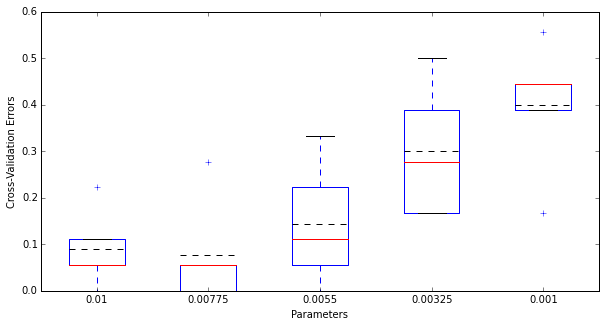

Training error: 0.0444444444444
Testing error: 0.0666666666667
N° iterations: 13625
Beta: [ -6.07258811e+00   7.03329870e+00  -8.26724873e+00  -2.25430210e-01
   1.24680827e+02  -2.80636719e+02   3.07024050e+00]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.0055


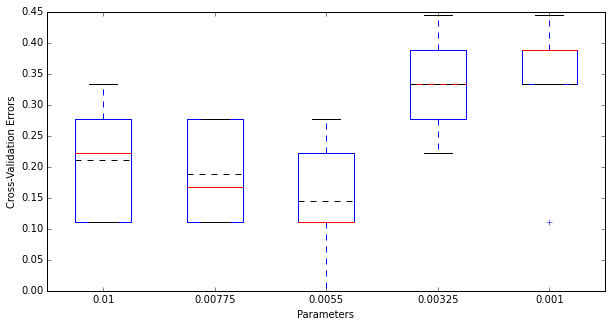

Training error: 0.155555555556
Testing error: 0.166666666667
N° iterations: 100000
Beta: [  85.582449      5.51768624   -6.92887744    0.90383805  137.34901635
 -394.48396529    0.9807746 ]
##############################################################




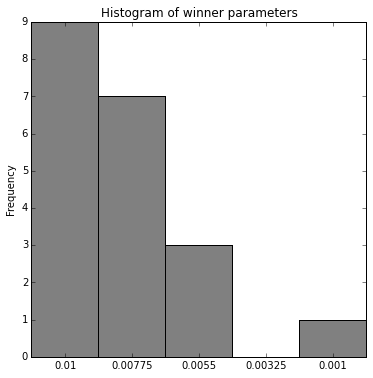

In [73]:
solve_regression(gd_stochastic, 'logistic', params=alphas3, show=[0,14])

### Rescaled data

##############################################################
Dataset: 0
Best alpha: 0.01


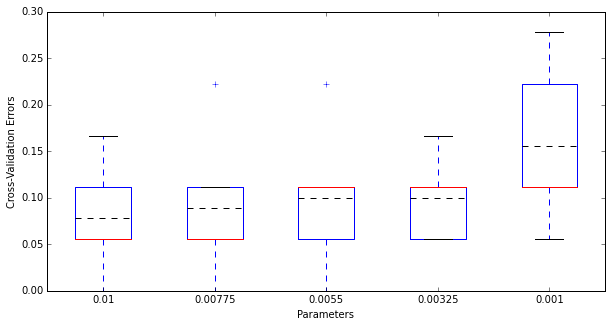

Training error: 0.0666666666667
Testing error: 0.1
N° iterations: 364
Last beta: [-0.89067992  1.89240682 -3.06533656 -0.49413702  8.38805164 -3.67234941
  1.39561496]
##############################################################




KeyboardInterrupt: 

In [87]:
solve_regression(gd_stochastic, 'logistic', params=alphas3, data_func=rescale, show=[0,14])

### Normalized data

##############################################################
Dataset: 0
Best alpha: 0.00325


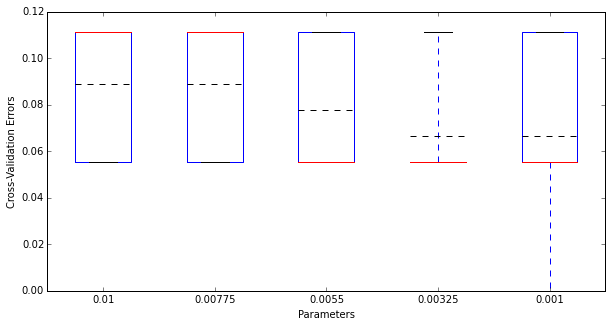

Training error: 0.0222222222222
Testing error: 0.0333333333333
N° iterations: 345
Beta: [-0.2385682   0.81850858 -1.27981156 -0.11349321  3.88872458 -2.76731914
  0.40282272]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.0055


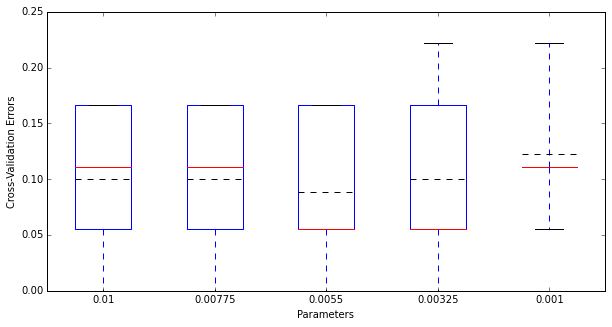

Training error: 0.0444444444444
Testing error: 0.0666666666667
N° iterations: 290
Beta: [ 0.20829953  1.02332025 -1.47941872 -0.31923802  4.65487619 -3.11664099
  0.09574176]
##############################################################




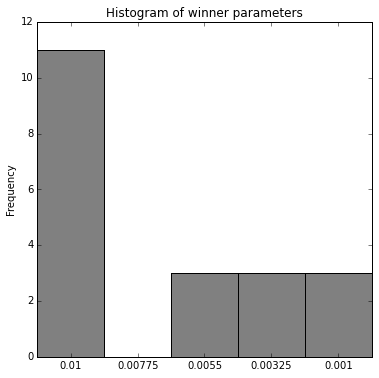

In [72]:
solve_regression(gd_stochastic, 'logistic', params=alphas3, data_func=normalize, show=[0,14])

** Análisis:**
+ Nuevamente en _raw data_ hay una cantidad muy alta de iteraciones en comparación a los otros dos, llegando incluso en uno de los casos a ocupar el máximo de 100.000 iteraciones. Es muy probable que el learning rate sea muy grande para esta data, vale decir, que no le permita seguir avanzando hacia el óptimo, sino que se queda dando pequeños saltos hacia adelante y atrás en el camino a la solución. Precisamente es en este dataset donde realiza todas las iteraciones, donde obtiene errores muy grandes en el training y testing (pues no logra acercarse al óptimo). Una forma de solucionar este problema sería ir disminuyendo el learning rate a medida que se acerca a la solución.
+ Para todas las representaciones de la data, el alfa ganador (con mayor frecuencia) fue el más alto.
+ El algoritmo tiene mejores resultados con _normalized data_, alcanzando error rates muy bajos en training y testing set.

### 1b) Newton Raphson

### Raw data

In [67]:
solve_regression(nr_logistic, 'logistic', data_func=normalize, show=[0,14])

##############################################################
Dataset: 0
Training error: 0.0
Testing error: 0.0333333333333
N° iterations: 17
Beta: [ -10.17632429   51.90495222 -223.06462833  -72.5822921   446.92953071
 -290.39247559    5.29862312]
##############################################################


##############################################################
Dataset: 14
Training error: 0.0222222222222
Testing error: 0.0333333333333
N° iterations: 14
Beta: [   6.21575176   18.14870684 -124.70691036  -40.65161461  235.09789749
 -145.40751338   -3.76500934]
##############################################################




### Rescaled data

In [69]:
solve_regression(nr_logistic, 'logistic', data_func=rescale, show=[0,14])

##############################################################
Dataset: 0
Training error: 0.0
Testing error: 0.1
N° iterations: 17
Beta: [   73.98701993   180.88595375  -814.87368456  -183.34781483  1865.9231994
  -602.60602669    22.16612173]
##############################################################


##############################################################
Dataset: 14
Training error: 0.0222222222222
Testing error: 0.133333333333
N° iterations: 14
Beta: [  66.60527006   62.6697612  -440.52106091  -98.52834405  948.8637574
 -296.81184378  -17.07077338]
##############################################################




### Normalized data

In [70]:
solve_regression(nr_logistic, 'logistic', data_func=normalize, show=[0,14])

##############################################################
Dataset: 0
Training error: 0.0
Testing error: 0.0333333333333
N° iterations: 17
Beta: [ -10.17632429   51.90495222 -223.06462833  -72.5822921   446.92953071
 -290.39247559    5.29862312]
##############################################################


##############################################################
Dataset: 14
Training error: 0.0222222222222
Testing error: 0.0333333333333
N° iterations: 14
Beta: [   6.21575176   18.14870684 -124.70691036  -40.65161461  235.09789749
 -145.40751338   -3.76500934]
##############################################################




**Análisis:**
+ Para los tres casos, el método de Newton-Rapshon tiene a producir errores prácticamente nulos en el training set, y errores bajo en el testing set, lo cual es bueno.
+ En _rescaled data_ se estiman parámetros de modelo un tanto distintos a los otros dos, y es precisamente el que tiene peores resultados en cuanto a error de generalización.
+ Es _normalized data_ quien obtiene nuevamente los mejores resultados.

### 2a) Gradiente Ascendente Online

En la tabla de a continuación se muestran los errores de training y testing de _GA online_ para las tres transformaciones de la data. Nuevamente el que obtiene los mejores resultados es _normalized data_ tanto en training como en testing. Para la mayor parte de los datasets, los resultados son similares. 

<img src='5.png' style="width: 850px;">

### 2b) Newton Raphson

En la tabla de a continuación se muestran los errores de training y testing de _Newthon-Raphson_ para las tres transformaciones de la data. Algunos comentarios de los resultados:

+ Newton-Raphson obtiene errores de entrenamiento muy bajos en la mayoría de los casos. Esto da a entender (al igual que para el caso de regresión lineal) que la convergencia de este método es superior, y le permite acercarse de mejor forma al óptimo. El overfitting de los datos de entrenamiento, se refleja en la subida en los errores de test (aunque son aceptables).
+ Llaman la atención algunos datasets (9 y 13 por ejemplo) que poseen errores muy grande tanto de entrenamiento como en test. Una posible explicación para esto es que el _step size_ sea demasiado grande, y que le impida acercarse a la solución (da pasos para adelante y para atrás). Otra posible causa, es que al generar aleatoriamente estos datasets, hayan quedado muchos _outliers_ que hiciesen la data menos linealmente separable.

<img src='6.png' style="width: 850px;">

### 3) Dependencia de la transformación en los datos

La aplicación de los algoritmos _GA online_ y _Newton-Raphson_ sobre las distintas transformaciones de los datos se encuentra directamente en los puntos anteriores con su respectivo análisis. A modo general se puede concluir lo siguiente:

+ La dependencia de los resultados con la transformación de los datos es clara, al igual que en regresión lineal. Los algoritmos en donde más se refleja esto, es en los de tipo gradiente descendente.  
+ La data normalizada tiende a producir mejores resultados para todos los algoritmos. Esta da a sospechar que las features de los datos tienen inherentemente una distribución normal.
+ Nuevamente el método de Newton es relativamente insensible a las transformaciones de data, pues produce resultados similares en cada caso.

## Conclusiones

+ En la práctica debiese hacerse cross-validation sobre todos los parámetros que afecten el resultado del modelo. En particular es muy importante el _eps_ o la tolerancia del error relativo, quien define el criterio de salida y que para este laboratorio fue configurado igual en todos los algoritmos, para favorecer la comparabilidad.
+ La data pura (sin normalizar ni escalar) para los algoritmos del tipo gradiente descente presentan un gran inconveniente. Este es que necesitan learning rates ($\alpha$) muy pequeños para converger. Por lo tanto, esto hace que el error cambie muy poco de iteración en iteración, y luego que se cumpla el criterio de salida en los algoritmos (cambio en el error relativo menor que $\epsilon$). Entonces los algoritmos pueden finalizar, sin haber realmente estado cerca del óptimo.
+ El método de _Newton-Raphson_ provee de una muy buena convergencia, pero sin embargo tiende a sobre ajustar el modelo en el training set (_overfitting_), y por lo tanto entrega mala capacidad de generalización en algunos casos.
+ En general se da la tendencia de que el error en el testing set es mayor que en el training set (en mayor o menor medida en cada algoritmo). Esto es bastante natural, pues el modelo es realizado por medio del training set.
+ La transformación de los datos que produjo mejor resultado fue normalizando. Esto da a entender que las features de los datos tienden a tener una distribución normal, producto de lo cual al normalizar las features se vuelven uniformes entre sí y por lo tanto los algoritmos (en especial los de tipo gradiente descendente) trabajan mucho mejor.

## Anexos

En la siguiente sección se encuentra todo el código necesario para reproducir cada uno de los resultados mostrados anteriormente. Para poder ejecutar el código en el informe, se debe en primer lugar ejecutar las celdas de código presentes en este anexo.

### Configuración del notebook

In [1]:
#notebook settings
%matplotlib inline

#import some useful libraries and utilities
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.cross_validation import KFold

#avoid numpy warning (they are handled correctly)
np.seterr('ignore')

#setting some paths
path1 = './cereales/'
#data directory
path2 = './credit/'

### Métricas de error para regresión lineal

In [2]:
#overall cost function for linear regresion
def J(X, y, beta):
    f = np.dot(X,beta)
    diff = f-y
    return 0.5*np.dot(diff,diff)

#mean squared error for linear regression 
def mse(X, y, beta):
    M,_ = X.shape
    f = np.dot(X,beta)
    diff = f-y
    return (1./(M-1))*np.dot(diff,diff)

### Implementación de algoritmos de regresión lineal

In [3]:
#batch gradient descent for linear regression
def gd_batch(X, y, alpha, eps=1e-5, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    J1 = J(X,y,beta)
    for i in xrange(max_iter):
        J0 = J1
        f = np.dot(X,beta)
        dJ = np.dot(X.T,f-y)
        #update beta
        beta -= alpha*dJ
        J1 = J(X,y,beta)
        #stopping criterion
        if np.abs(J1-J0)/J0 < eps:
            break
    return (beta,i+1)

#online gradient descent for linear regression
def gd_online(X, y, alpha, eps=1e-5, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    J1 = J(X,y,beta)
    for i in xrange(max_iter):
        J0 = J1
        for m in xrange(M):
            #update beta
            beta -= alpha*(np.dot(X[m],beta)-y[m])*X[m]
        J1 = J(X,y,beta)
        #stopping criterion
        if np.abs(J1-J0)/J0 < eps: break
    return (beta,i+1)

#Newton-Raphson method for linear regression
def nr_linear(X, y, eps=1e-5, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    J1 = J(X,y,beta)
    #Hessian matrix must be computed just the first time
    Hess = np.dot(X.T,X)
    for i in xrange(max_iter):
        J0 = J1
        f = np.dot(X,beta)
        dJ = np.dot(X.T,f-y)
        beta -= np.linalg.solve(Hess, dJ)
        J1 = J(X,y,beta)
        if np.abs(J1-J0)/J0 < eps: break
    return (beta,i+1)

** Comentarios de implementación:**
* Para todos los algoritmos existen básicamente dos criterios de salida. El primero es
    cuando el error relativo es menor a _eps_, vale decir, cuando la función de error esta
    cambiando muy poco de iteración en iteración. El segundo es el número máximo de iteraciones, más
    que nada para detener algoritmos que no pueden cumplir con el criterio del error (learning rates muy
    altos por ejemplo).
* La tolerancia ocupada por defecto (_eps_) es de 1e-5.
* Todos los _starting guest_ son el vector zeros. Esto para reproducir y comparar resultados
    de manera adecuada.
* En vez de invertir la matriz Hessiana en Newton-Raphson, se opta por resolver el sistema lineal
    asociado, por razones de estabilidad numérica.

### Implementación de locally weighted linear regression

In [4]:
#compute weights for all samples in X matrix, respect to x0
def weight(X, x0, tau):
    Diff = X - x0
    Diff *= Diff
    return np.exp(-1*np.sum(Diff,axis=1)/(2.*tau**2))

#weighted cost function
def wJ(X, y, beta, w):
    f = np.dot(X,beta)
    diff = f-y
    diff **=2
    return 0.5*np.dot(w,diff)

#weighted mean squared error
def wmse(X, y, beta, w):
    M,_ = X.shape
    f = np.dot(X,beta)
    diff = f-y
    diff **=2
    return (1./(M-1))*np.dot(w,diff)

#find best beta for locally weighted linear regression
def min_weighted(X, y, w):
    W = np.diag(w)
    M = np.dot(X.T, np.dot(W, X))
    b = np.dot(X.T, np.dot(W, y))
    return np.linalg.solve(M,b)

### Métricas de error para regresión logística

In [5]:
#log likelihood function for logistic regression
"""
Computing l this way, make it more stable numerically (no overflows en exp)
"""
def l(X, y, beta):
    y1_mask = y.astype(bool)
    y0_mask = np.logical_not(y1_mask)
    f = sigmoid(np.dot(X,beta))
    return (np.log(f[y1_mask])).sum() + (np.log(1-f[y0_mask])).sum()
    

#error rate for logistic regression
def error_rate(X, y, beta):
    h = np.round(sigmoid(np.dot(X,beta)))
    h = h.astype(int)
    y = y.astype(int)
    m, = h.shape
    return np.logical_xor(h,y).sum()/np.float(m)

### Implementación de algoritmo de regresión logística

In [6]:
#sigmoid function
def sigmoid(z):
    return 1./(1.+np.exp(-z))

#stochastic gradient ascent for logistic regression
def gd_stochastic(X, y, alpha, eps=1e-3, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    l1 = l(X, y, beta)+1.
    for i in xrange(max_iter):
        l0 = l1
        for m in xrange(M):
            beta += alpha*(y[m]-sigmoid(np.dot(X[m],beta)))*X[m]
        l1 = l(X,y,beta)+1.
        if np.abs(l1-l0)/np.abs(l0) < eps: break
    return (beta,i+1)

#Newton-Raphson method for logistic regression
def nr_logistic(X, y, eps=1e-3, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    l1 = l(X, y, beta)+1.
    for i in xrange(max_iter):
        l0 = l1
        f = sigmoid(np.dot(X,beta))
        W = np.diag(f*(1-f))
        Hess = -1*np.dot(X.T, np.dot(W, X))
        Dl = np.dot(X.T, y-f)
        #when it converges, Hess became singular
        try:
            beta -= np.linalg.solve(Hess, Dl)
        except np.linalg.LinAlgError:
            break
        l1 = l(X, y, beta)+1.
        if np.abs(l1-l0)/np.abs(l0) < eps: break
    return (beta,i+1)

**Comentarios de implementación:**
* Para ambos algoritmos hay dos criterios de salida. El primero es cuando la función _log verosimilitud_ cambia relativamente menor a _eps_ en cada iteración (pues es la función que se quiere maximizar). Se tiene en cuenta además que en el óptimo esta función debe ser 0 (en el óptimo la función de _verosimilitud_ es 1, pues maximiza la probabilidad para cada dato), por lo que se le suma un 1 para evitar problemas al computar el criterio de salida. El segundo criterio el número máximo de iteraciones.
* La tolerancia ocupada por defecto (_eps_) es de 1e-3.
* Existe un tercer criterio de salida en el método de _Newton-Raphson_. A medida que converge, el vector $f$ con las probabilidades de pertenecer a la clase 1 de todos los datos, tiene sólo valores cercanos a 0 y 1. Luego al computar la matriz $W$, esta empezará a tener filas completas de 0 o valores muy cercanos a 0, y por lo tanto la matriz Hessiana también, y al converger esta matriz se vuelve singular. Para eso se ocupa el manejo de la excepción en caso de existir singularidad.

### Funciones para manejo de la data

In [7]:
#Rescale features of M to [a,b] range
def rescale(M, a=0., b=1.):
    #max and min vectors
    maxv = np.max(M, axis=0)
    minv = np.min(M, axis=0)
    return (b-a)*M/(maxv-minv) + (a*maxv-b*minv)/(maxv-minv)

#Normalize features of M
def normalize(M):
    #mean and standard deviation vectors
    meanv = np.mean(M, axis=0)
    stdv = np.std(M, axis=0)
    return (M-meanv)/stdv

### Funciones para Cross-Validation

In [18]:
""" find the best learning parameter for algorithm, between 
parameters in params using 5-fold cross validation """
def cross_alpha(X, y, algorithm, error_func, params):
    #creating kfold
    m,n = X.shape
    kf = KFold(m, n_folds=5)
    cv_err = np.empty((5,5))
    i = 0 #index of fold
    
    for tr_index,ts_index in kf:
        j = 0 #index of parameter
        X_tr, X_ts = X[tr_index], X[ts_index]
        y_tr, y_ts = y[tr_index], y[ts_index]
        for param in params:
            beta,_ = algorithm(X_tr, y_tr, alpha=param)
            cv_err[i,j] = error_func(X_ts, y_ts, beta)
            j += 1
        i += 1
        
    #arrays with mean cv-error for each alpha
    cv_mean = np.mean(cv_err, axis=0)
    return params[np.argmin(cv_mean)], cv_err

""" find the best band width parameter for locally
weighted linear regression, between parameters in params 
using 5-fold cross validation """
def cross_tau(X, y, params):
    #creating kfolds
    m,n = X.shape
    kf = KFold(m, n_folds=5)
    cv_err = np.zeros((5,5))
    i = 0 #index of fold
    
    for tr_index,ts_index in kf:
        X_tr, X_ts = X[tr_index], X[ts_index]
        y_tr, y_ts = y[tr_index], y[ts_index]
        j = 0 #index of parameter
        for tau in params:
            for x0 in X_ts:
                w1 = weight(X_tr, x0, tau)
                beta = min_weighted(X_tr, y_tr, w1)
                cv_err[i,j] += mse(X_ts, y_ts, beta)
            cv_err[i,j] /= X_ts.shape[0]
            j +=1
        i +=1
    
    #arrays with mean costs for each alpha
    cv_mean = np.mean(cv_err, axis=0)
    return params[np.argmin(cv_mean)], cv_err

### Funciones complementarias (Helpers) para obtener resultados

In [84]:
"""
Function to generate histogram of winners
"""
def make_hist(winners,params):
    winners = np.array(winners)
    freqs = np.zeros(5)
    for i in xrange(5):
        freqs[i] = np.sum(params[i]==winners)

    labels = map(str,params)
    pos = np.arange(len(labels))
    width = 1.0
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(5)
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(labels)
    plt.ylabel('Frequency')
    plt.title('Histogram of winner parameters')
    plt.bar(pos, freqs, width, color='0.5')
    plt.show()

"""
Generate solutions for regression problems 
(linear and logistic)
"""
def solve_regression(algorithm, kind, params=None, data_func=None, show=None):
    if params is not None:
        winners = list()
    
    if kind=='linear':
        path = path1+'cereales'
        error_func = mse
    elif kind=='logistic':
        path = path2+'credit'
        error_func = error_rate
    else:
        print "Unknown kind!"
        return -1

    for i in xrange(20):
        #Loading dataset
        tr_file = path+'-tr-{0}.npy'.format(i)
        ts_file = path+'-ts-{0}.npy'.format(i)
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)
        
        if data_func is not None:
            X_tr = data_func(tr_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        #Adding column of 1's
        m,n = X_tr.shape
        X_tr = np.concatenate((np.ones((m,1)),X_tr),axis=1)

        if data_func is not None:
            X_ts = data_func(ts_data[:,:-1])
        else: 
            X_ts = ts_data[:,:-1]
        y_ts = np.ascontiguousarray(ts_data[:,-1])
        #Adding column of 1's
        m,n = X_ts.shape
        X_ts = np.concatenate((np.ones((m,1)),X_ts),axis=1)

        if params is not None:
            alpha,cv_err = cross_alpha(X_tr, y_tr, algorithm, error_func, params)
            winners.append(alpha)
            beta,it = algorithm(X_tr, y_tr, alpha)
        else:
            beta,it = algorithm(X_tr, y_tr)
        
        if (show is not None) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        if params is not None:
            print 'Best alpha: {0}'.format(alpha)
            fig = plt.figure()
            fig.set_figheight(5)
            fig.set_figwidth(10)
            plt.xlabel('Parameters')
            plt.ylabel('Cross-Validation Errors')
            plt.boxplot(cv_err, showmeans=True, meanline=True)
            plt.xticks([1, 2, 3, 4, 5], map(str,params))
            plt.show()
        print 'Training error: {0}'.format(error_func(X_tr,y_tr,beta))
        print 'Testing error: {0}'.format(error_func(X_ts,y_ts,beta))
        print 'N° iterations: {0}'.format(it)
        print 'Last beta: {0}'.format(beta)
        print "##############################################################"
        print '\n'
    
    if params is not None:
        make_hist(winners,params)

"""
Generate solutions for locally weighted linear regression problems
"""
def solve_weighted(params, data_func=None, show=None):
    #list with winners-alphas
    winners = list()

    for i in xrange(20):
        #Loading dataset
        tr_file = path1+'cereales-tr-{0}.npy'.format(i)
        ts_file = path1+'cereales-ts-{0}.npy'.format(i)
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)

        if data_func is not None:
            X_tr = data_func(tr_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        #Adding column of 1's
        m,n = X_tr.shape
        X_tr = np.concatenate((np.ones((m,1)),X_tr),axis=1)

        if data_func is not None:
            X_ts = data_func(ts_data[:,:-1])
        else: 
            X_ts = ts_data[:,:-1]
        y_ts = np.ascontiguousarray(ts_data[:,-1])
        #Adding column of 1's
        m,n = X_ts.shape
        X_ts = np.concatenate((np.ones((m,1)),X_ts),axis=1)

        
        tau,cv_err = cross_tau(X_tr, y_tr, params)
        winners.append(tau)
        tr_err = 0
        ts_err = 0
        for x0 in X_ts:
            w = weight(X_tr, x0, tau)
            beta = min_weighted(X_tr, y_tr, w)
            tr_err += mse(X_tr, y_tr, beta)
            ts_err += mse(X_ts, y_ts, beta)
        M = X_ts.shape[0]  
        tr_err /= M
        ts_err /= M
        
        if (show is not None) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        print 'Best tau: {0}'.format(tau)
        fig = plt.figure()
        fig.set_figheight(5)
        fig.set_figwidth(10)
        plt.xlabel('Parameters')
        plt.ylabel('Cross-Validation Errors')
        plt.boxplot(cv_err, showmeans=True, meanline=True)
        plt.xticks([1, 2, 3, 4, 5], map(str,params))
        plt.show()
        print cv_err
        print 'Mean training error: {0}'.format(tr_err)
        print 'Mean testing error: {0}'.format(ts_err)
        print "##############################################################"
        print '\n'
    make_hist(winners,params)

In [11]:
wa = np.load(path1+'cereales-tr-0.npy')
X = normalize(wa[:,:-1])
y = wa[:,-1]